## Readme how to run chosen model
1. Run libraries
2. Load files (change your file directory based on your system)
3. Drop unneccessary columns in part 1.1
4. Run replace outliers with median in part 1.5
5. Run normalisation(robust scaler) in part 1.8
6. Seperate X and Y variable in part 2.4
7. Split dataset into two parts training and validation in part 2.5
8. Run the chosen best model in part 3.3.2. *This step may take several steps depending on the performance of your computer*
9. Run predictions status from part 4.1 to 4.6 (This will save to the predictions file with 4 columns representing 4 predictions)

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer


# 1. Exploratory Data Analysis (EDA)

In [2]:
# Reading the first five rows of data as dataframe
diabates_train_df = pd.read_csv('data_train.csv')
diabates_train_df.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0


In [3]:
diabates_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Id                    202944 non-null  int64
 1   HighBP                202944 non-null  int64
 2   HighChol              202944 non-null  int64
 3   CholCheck             202944 non-null  int64
 4   BMI                   202944 non-null  int64
 5   Smoker                202944 non-null  int64
 6   Stroke                202944 non-null  int64
 7   HeartDiseaseorAttack  202944 non-null  int64
 8   PhysActivity          202944 non-null  int64
 9   Fruits                202944 non-null  int64
 10  Veggies               202944 non-null  int64
 11  HvyAlcoholConsump     202944 non-null  int64
 12  AnyHealthcare         202944 non-null  int64
 13  NoDocbcCost           202944 non-null  int64
 14  GenHlth               202944 non-null  int64
 15  MentHlth              202944 non-n

In [4]:
diabates_train_df.isna().sum()

Id                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

> <span style="font-size:1em;">✔</span> **Observations:** 
> - Dataset has 202944 rows and 25 columns, with no missing values or NaN value.

In [5]:
diabates_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,202944.0,101471.500000,58585.030853,0.0,50735.75,101471.5,152207.25,202943.0
HighBP,202944.0,0.428700,0.494891,0.0,0.00,0.0,1.00,1.0
HighChol,202944.0,0.424344,0.494244,0.0,0.00,0.0,1.00,1.0
CholCheck,202944.0,0.962655,0.189607,0.0,1.00,1.0,1.00,1.0
BMI,202944.0,28.379824,6.612738,12.0,24.00,27.0,31.00,98.0
Smoker,202944.0,0.442634,0.496700,0.0,0.00,0.0,1.00,1.0
Stroke,202944.0,0.040844,0.197929,0.0,0.00,0.0,0.00,1.0
HeartDiseaseorAttack,202944.0,0.094391,0.292372,0.0,0.00,0.0,0.00,1.0
PhysActivity,202944.0,0.756302,0.429313,0.0,1.00,1.0,1.00,1.0
Fruits,202944.0,0.635372,0.481327,0.0,0.00,1.0,1.00,1.0


> <span style="font-size:1em;">✔</span> **Observations:** 
> - Id: range from 0 to 2020944
> - HighBp: categorical type (0 or 1). The mean value suggests that approximately 42.97% of individuals in the dataset have high blood pressure. The standard deviation indicates some variability in the occurrence of high blood pressure among individuals
> - HighChol: Similar to HighBp
> - CholCheck: categorical type (0 or 1). High mean value indicates large amount of people undergone cholesterol check within 5 year
> - BMI: continous type. The mean BMI is 28.37, indicating individuals are overweight.The large standard deviation (6.61) suggests a wide variability in BMI among individuals. Min is 12 and max is 98
> - Smoker: categorical type (0 or 1). The mean value suggests that approximately 44.26% of individuals are smokers.
> - Stroke: categorical type (0 or 1).Low mean value (0.0408) suggests that strokes are relatively uncommon in the dataset.
> - HeartDiseaseorAttack: categorical type (0 or 1).
> - PhysActivity: categorical type (0 or 1). Mean value is 0.75 indicates, most people do exercises frequently
> - Fruits: categorical type (0 or 1). Mean value is 0.63, indicates above average people eat fruit
> - Vegies: categorical type (0 or 1). Mean value is 0.81, indicates most people eat vegetables per day
> - HvyAlcoholConsump: categorical type (0 or 1). The mean value described the small number of people consumes Heavy alcohol 
> - AnyHealthcare: categorical type (0 or 1). The mean illustrate 0.95, indicates high number of people prepaid health insurance
> - NoDocbcCost: categorical type (0 or 1). Mean indicates small amount of people do not see doctor due to the cost
> - GenHlth: categorical type (1: excelent, 2: very good, 3: good, 4: fair, 5: poor). The average general health assessment is around moderate, with slight variability.
> - MentHlth: numerical type (range from 1 to 30). Mental health assessments show considerable variability, with the average being moderate.
> - PhysHlth: numerical type (range from 1 to 30).Physical health assessments exhibit significant variability, with a tendency towards lower ratings on average.
> - DiffWalk: categorical type (0 or 1). Difficulty in walking appears to be relatively uncommon, with little variability observed.
> - Sex: categorical type (0: female, 1:male).The dataset seems to have a slightly higher proportion of males, with a nearly equal distribution between sexes
> - Age: categorical type. 
> - Income: categorical type. The mean indicates people have income less than  35,000 USD
> - ExtraMedTest and ExtraAlcoholTest: These columns likely represent additional medical and alcohol tests, respectively. Negative mean values indicate that, on average, individuals have not undergone these tests, with wide variability observed



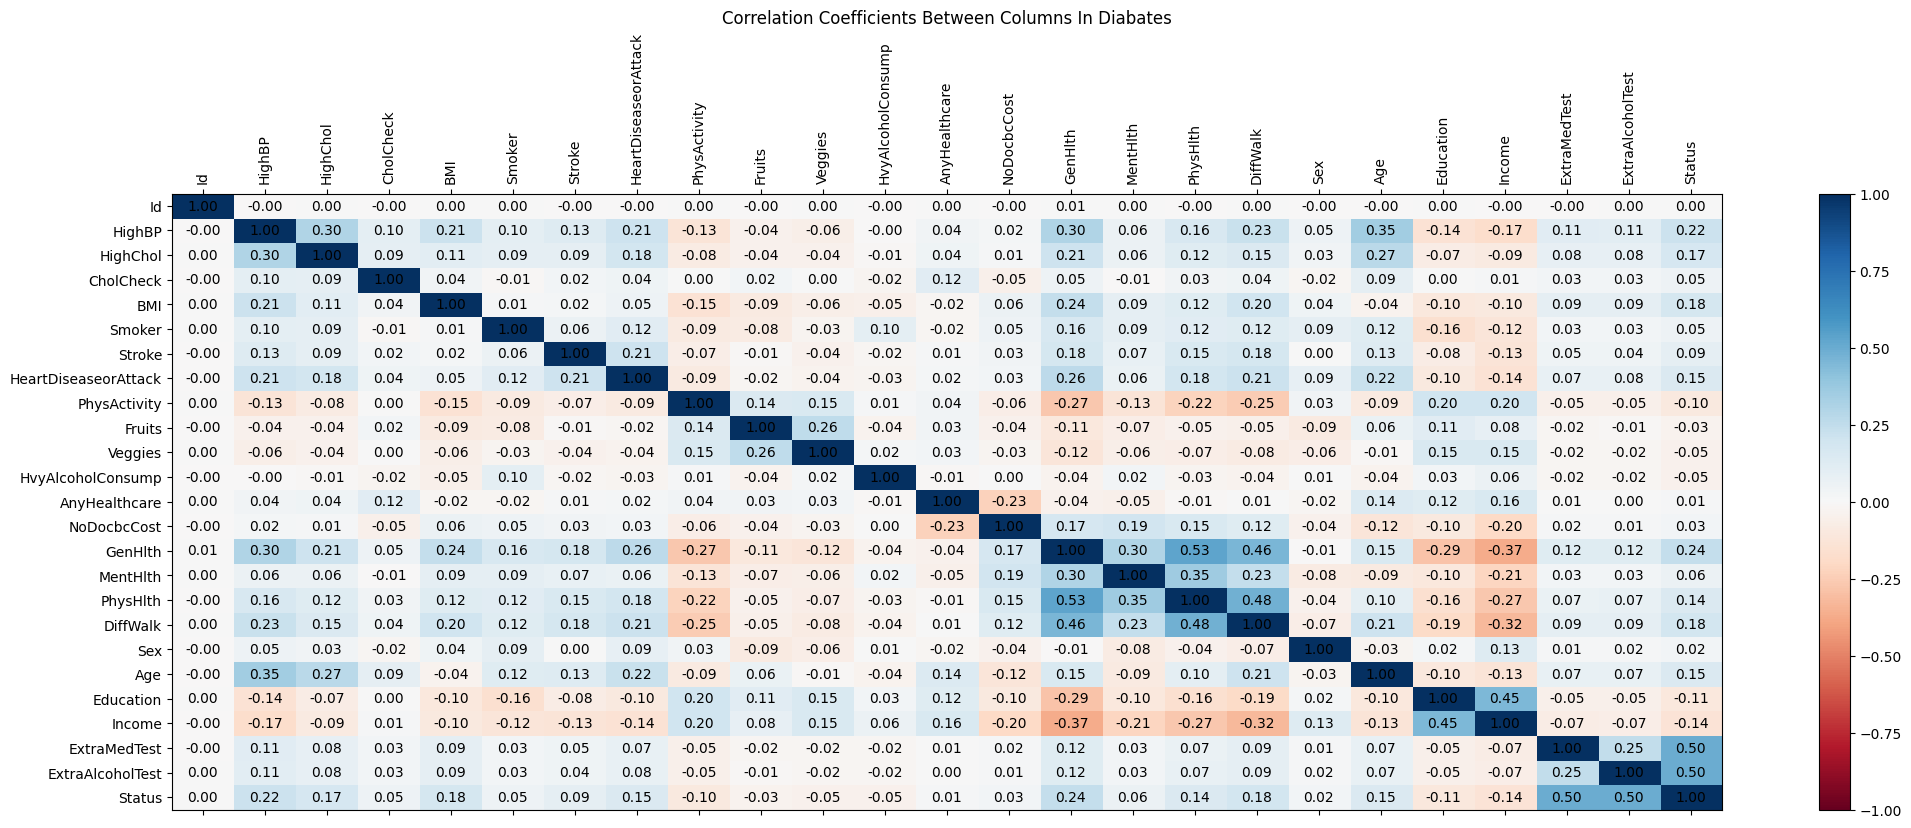

In [6]:
correlation_matrix = diabates_train_df.corr()
fig, ax = plt.subplots(figsize=(25, 8))
cax = ax.matshow(correlation_matrix, cmap='RdBu', vmin=-1, vmax=1,aspect='auto')
cbar = fig.colorbar(cax)
ticks = np.arange(0, len(diabates_train_df.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(diabates_train_df.columns, rotation=90)
ax.set_yticklabels(diabates_train_df.columns)
plt.title('Correlation Coefficients Between Columns In Diabates')

for i in range(len(diabates_train_df.columns)):
    for j in range(len(diabates_train_df.columns)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")
plt.show()

In [7]:
absCorrwithStatus = []
allVars = diabates_train_df.columns

for var in allVars:
    absCorrwithStatus.append(abs(diabates_train_df['Status'].corr(diabates_train_df[var])))

display(pd.DataFrame([allVars, absCorrwithStatus], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
24,Status,1.0
22,ExtraMedTest,0.499234
23,ExtraAlcoholTest,0.498742
14,GenHlth,0.242096
1,HighBP,0.216561
17,DiffWalk,0.181007
4,BMI,0.178972
2,HighChol,0.166249
19,Age,0.146599
7,HeartDiseaseorAttack,0.145864


> <span style="font-size:1em;">✔</span> **Observations:**
> - Id attribute is not impacted in dataset due to the coeffiecent is 0 compared to all attributes, thus Id is dropped
> - ExtraMedTest and ExtraAlcoholTest are moderately correlation with target variable 
> - As we know that if a variable has a very low correlation with the target variable it's not going to be useful for the model prediction.  Therefore, **Veggies,Fruits,NoDocbcCost, Sex and AnyHealthcare** are dropped due to it's correlation with the target variable is relatively small

### 1.1 Dropping columns: Based on heatmap and correlation table

In [8]:
# drop columns
diabates_train_df = diabates_train_df.drop(columns=['Id','Veggies','Fruits','NoDocbcCost','Sex','AnyHealthcare'], axis=1)

### 1.2: Histogram

In [9]:
columns = diabates_train_df.columns

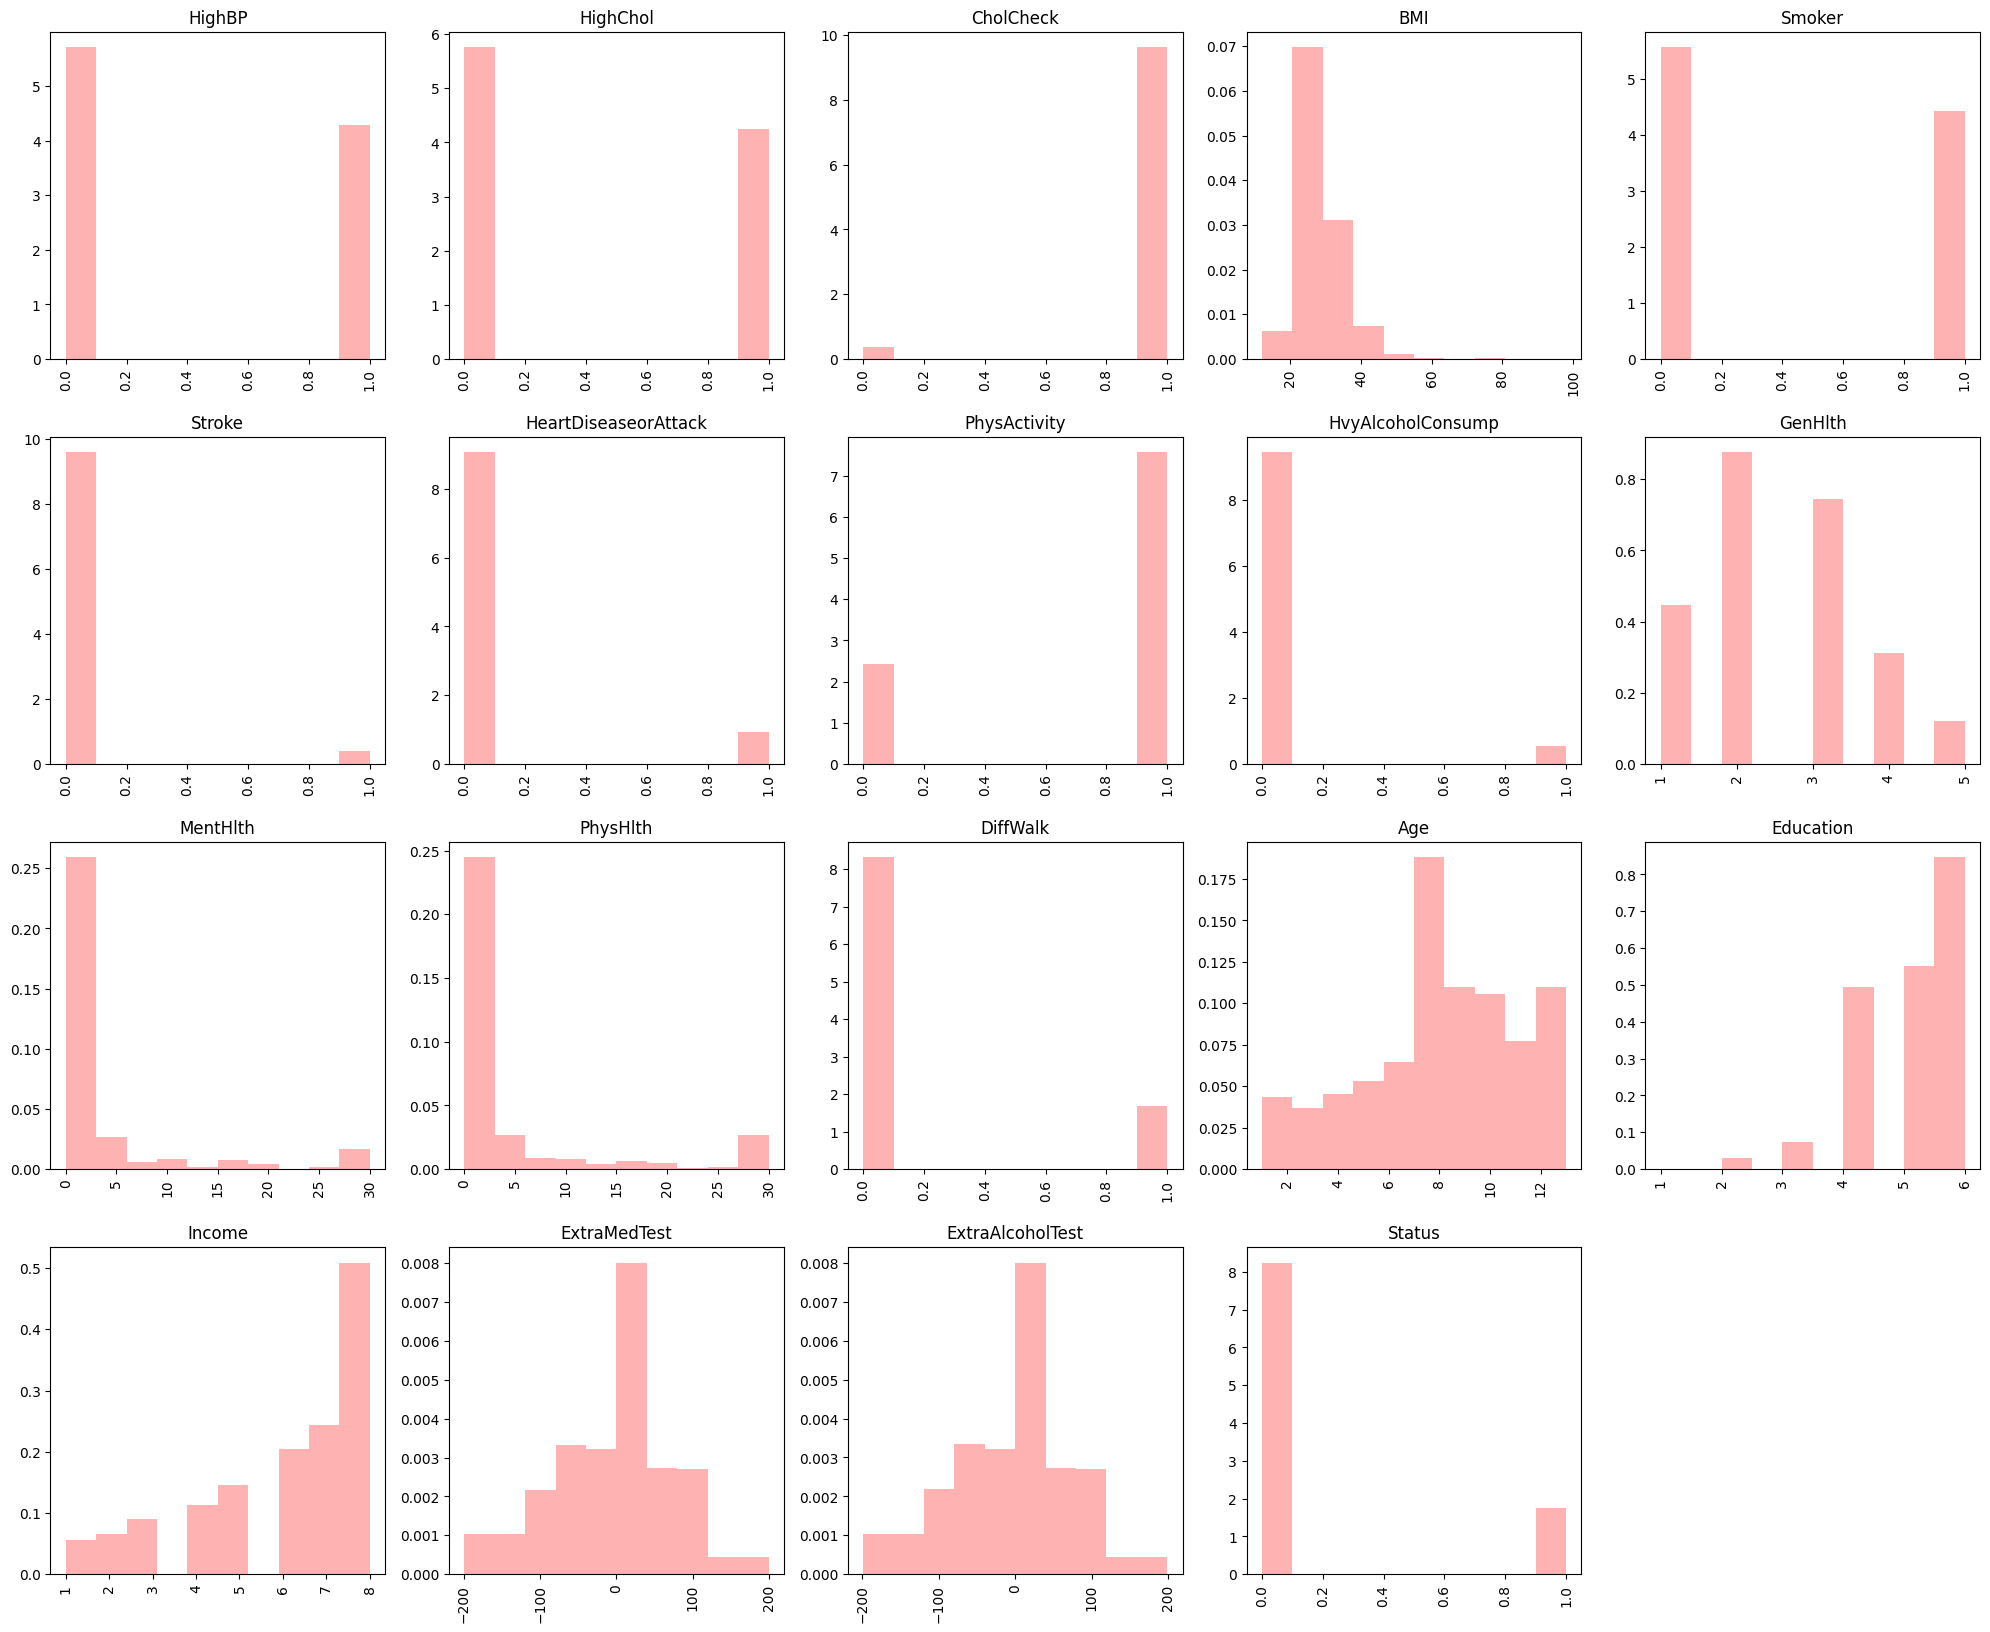

In [10]:
plt.figure(figsize=(20,20))
for i, col in enumerate(diabates_train_df[columns]):
    plt.subplot(5,5,i+1)
    plt.hist(diabates_train_df[columns][col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
plt.tight_layout()

> <span style="font-size:1em;">✔</span> **Observations:** 
> - Most of columns in dataset are categorical type 

### 1.3: Boxplot

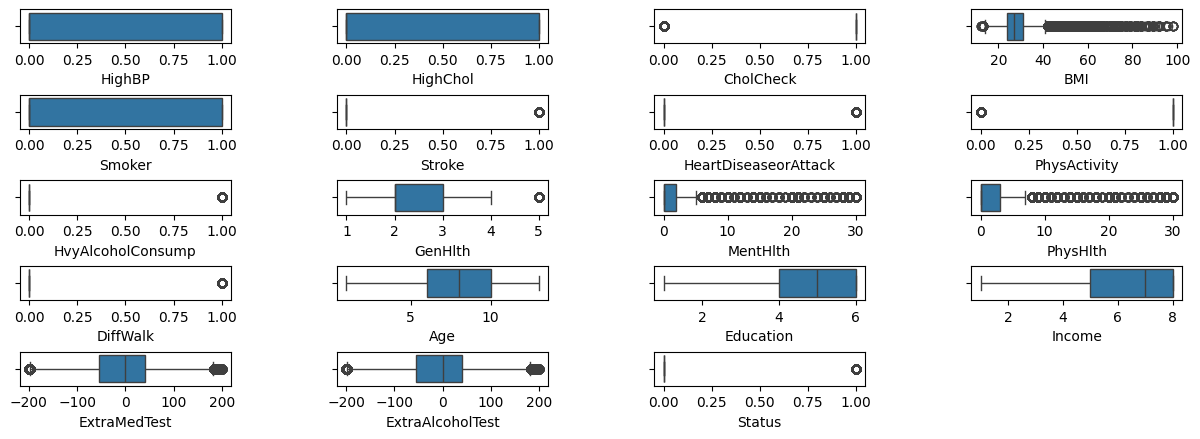

In [11]:
plt.figure(figsize=(15, 6))
for col_idx, col in enumerate(columns):
    plt.subplot(6, 4, col_idx + 1)
    sns.boxplot(data=diabates_train_df, x=col)
plt.subplots_adjust(wspace=0.5, hspace= 1.5)
plt.show()

> <span style="font-size:1em;">✔</span> **Observations:** 
> - BMI, MentHlth, PhysHlth have many outliers.

### 1.4: Distribution plot

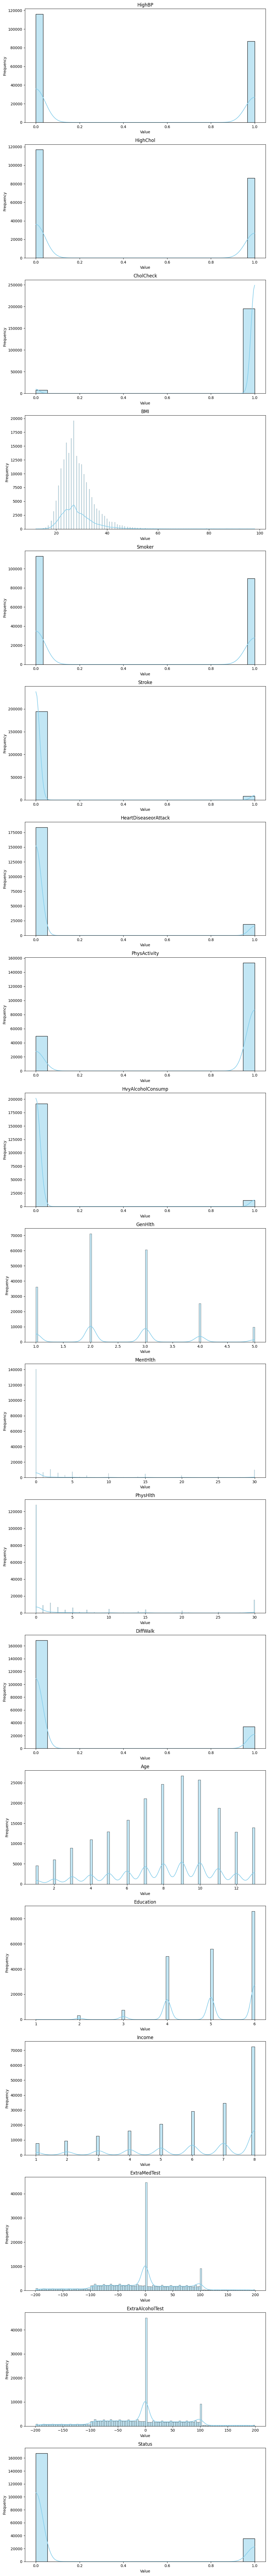

In [12]:
plt.figure(figsize=(10, 5 * len(diabates_train_df.columns)))  # Adjust figsize as needed
for i, column in enumerate(diabates_train_df.columns):
    plt.subplot(len(diabates_train_df.columns), 1, i+1)  # Adjust subplot layout
    sns.histplot(diabates_train_df[column], kde=True, color='skyblue')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


> <span style="font-size:1em;">✔</span> **Observations:** 
> - BMI, MentHlth, PhysHlth columns have many outliers above upper whisker causing a right skew distribution. Therefore, when replacing outliers of these columns, I suggest to replace with median because it does not affect by outliers

### 1.5: Replace outliers using median

In [13]:
def replace_outliers_with_median(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = ((df[cols] < lower_bound) | (df[cols] > upper_bound))

    # Replace outliers with median value for each column
    for col in cols:
        median_val = df[col].median()
        df.loc[outliers[col], col] = median_val

    return df


In [14]:
# Replace outliers with median for columns 'BMI', 'MentHlth', and 'PhysHlth'
diabates_train_df = replace_outliers_with_median(diabates_train_df, ['BMI','MentHlth','PhysHlth'])

# Print the DataFrame with outliers replaced by the median
diabates_train_df.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,2,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,0,1,1,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,0,3,0,0,1,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,0,3,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,3,0,0,0,9,5,4,-58,0,0


### 1.6: Boxplot after replace outliers with median

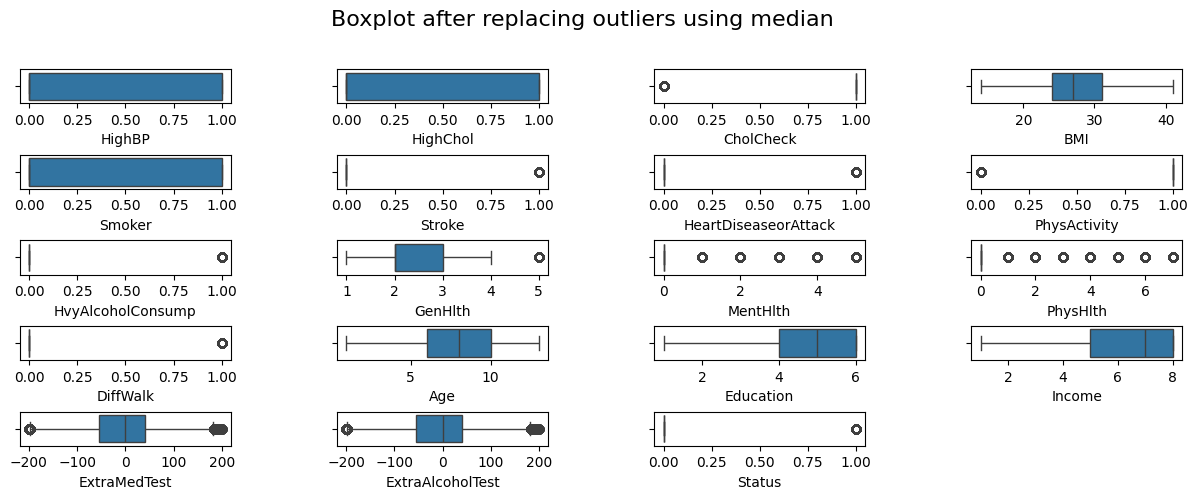

In [15]:
plt.figure(figsize=(15, 6))
for col_idx, col in enumerate(columns):
    plt.subplot(6, 4, col_idx + 1)
    sns.boxplot(data=diabates_train_df, x=col)
plt.subplots_adjust(wspace=0.5, hspace= 1.5)
plt.suptitle('Boxplot after replacing outliers using median', fontsize=16)
plt.show()

### 1.7: Histogram after replacing outliers with median

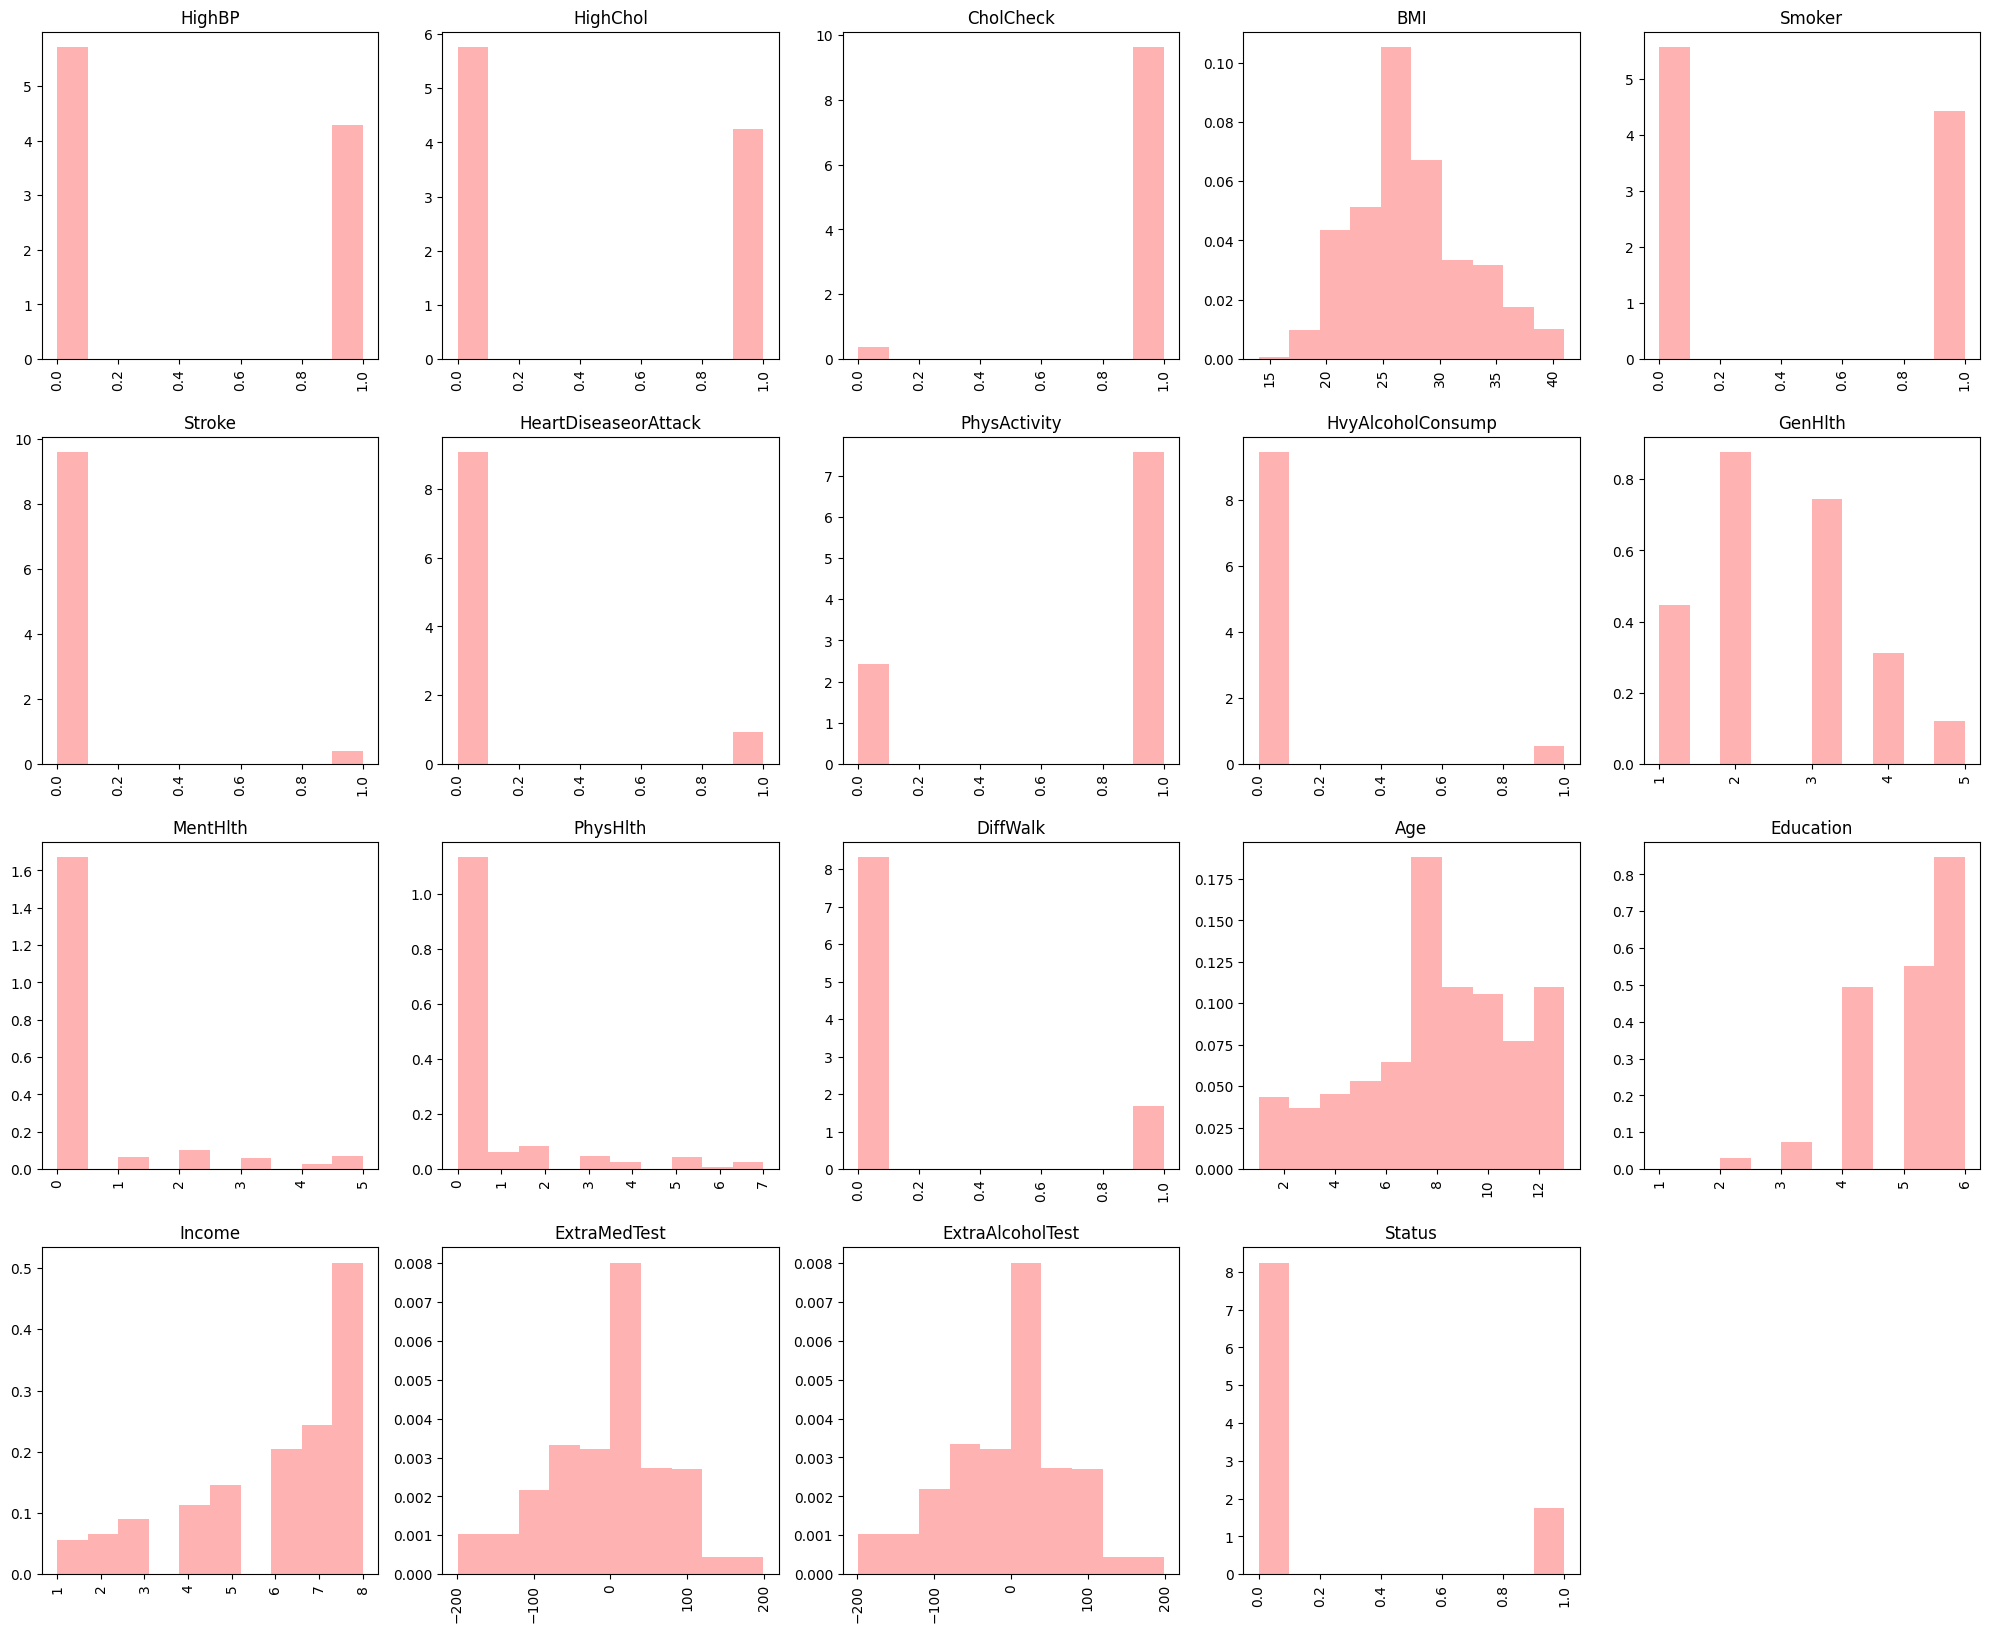

In [16]:
plt.figure(figsize=(20,20))
for i, col in enumerate(diabates_train_df[columns]):
    plt.subplot(5,5,i+1)
    plt.hist(diabates_train_df[columns][col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
plt.tight_layout()

### 1.8: Normalization

In [17]:
# Robust scaler
scaled_columns = ['BMI','MentHlth','PhysHlth','ExtraMedTest','ExtraAlcoholTest']
scaler = RobustScaler()

# Extract the columns to be scaled from the dataframe
scaled_data = diabates_train_df[scaled_columns]

# Fit the scaler to the data and transform it
scaled_data_transformed = scaler.fit_transform(scaled_data)

# Convert the scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data_transformed, columns=scaled_columns)

diabates_train_df[scaled_columns] = scaled_data_df
scaled_data_df.head()

,BMI,MentHlth,PhysHlth,ExtraMedTest,ExtraAlcoholTest
0,-0.428571,0.0,0.0,0.631579,0.000000
1,0.142857,1.0,0.0,0.000000,-0.673684
2,1.285714,0.0,0.0,-0.484211,0.000000
3,1.142857,0.0,0.0,-0.873684,-1.978947
4,0.000000,0.0,0.0,-0.610526,0.000000


In [18]:
diabates_train_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,-0.428571,1,0,0,1,0,2,0.0,0.0,0,8,4,5,0.631579,0.000000,0
1,0,0,1,0.142857,0,0,0,1,0,1,1.0,0.0,0,2,6,8,0.000000,-0.673684,0
2,0,0,1,1.285714,1,0,0,1,0,3,0.0,0.0,1,3,2,1,-0.484211,0.000000,0
3,0,1,1,1.142857,0,0,0,1,0,3,0.0,0.0,0,8,6,8,-0.873684,-1.978947,0
4,0,1,1,0.000000,0,0,0,1,0,3,0.0,0.0,0,9,5,4,-0.610526,0.000000,0


> <span style="font-size:1em;">✔</span> **Observations:**
> - Normalization is applied into numerical columns include BMI,MentHlth,PhysHlth,ExtraMedTest,ExtraAlcoholTest. After normalizing, value in each columns changed so that I added columns to new dataframe named 'scaled_data_df'. Then replace old columns in original dataframe with 'scaled_data_df'

# 2. Model proposal:
- Polynomial Logistics Regression 
- Decision Tree
- Random Forest


### 2.1 Polynomial Logistic Regression:

<span>✔</span> Strengths:
- It can model non-linear relationships between features and target variables using polynomial terms.
- Provides probabilities of class membership, allowing for probabilistic interpretation of predictions.
- Relatively simple and interpretable compared to more complex models
<br>

<span>✔</span> Weaknesses:
- Assumes a linear decision boundary, which may not be suitable for complex or highly non-linear datasets.
- Can suffer from overfitting if the degree of polynomial features is too high relative to the amount of data. <br>

<span>✔</span> Suitability:
- Suitable for tasks where the relationship between features and target variables is expected to be non-linear but still interpretable.
- It's appropriate for datasets with moderate complexity and when probabilistic interpretation of predictions is desired

### 2.2 Decision Tree:

<span>✔</span> Strengths:
- Able to capture complex non-linear relationships and interactions between features.
- Intuitive and easy to interpret, making it useful for understanding feature importance and decision-making.
- Naturally handles categorical variables without the need for one-hot encoding.

<span>✔</span> Weaknesses:
- Prone to overfitting, especially on noisy or high-dimensional datasets.
- Can be unstable, as small changes in data can lead to significantly different trees.
- Decision trees are biased towards features with more levels, leading to potential imbalance in feature importance.

<span>✔</span> Suitability:
- Suitable for tasks where interpretability and understanding of feature importance are important. It's useful for exploratory analysis and when decision-making transparency is required.

### 2.3 Random Forest:

<span>✔</span> Strengths:

- Combines multiple decision trees through ensemble learning, leading to improved generalization performance and reduced overfitting compared - to individual decision trees.
- Can handle high-dimensional data and large feature spaces effectively.
Robust to noise and outliers due to averaging predictions across multiple trees.

<span>✔</span> Weaknesses:
- Less interpretable compared to individual decision trees, as it's challenging to understand the combined effect of multiple trees.
- Computationally more expensive than individual decision trees due to training multiple trees.

<span>✔</span> Suitability:

- Suitable for tasks where high predictive accuracy is desired, and interpretability is not the primary concern. It's effective for handling - complex datasets with a large number of features and when robustness to noise and outliers is important

### 2.4 Seperate X and Y variables

In [19]:
diabates_Y = diabates_train_df['Status']
diabates_X = diabates_train_df.drop(columns='Status', axis=1)

### 2.5 Split dataset into two parts training and validation

In [20]:
train_X, val_X, train_Y, val_Y = train_test_split(diabates_X, diabates_Y, test_size= 0.2, shuffle= True)

print(train_X.shape)
print(train_Y.shape)
print(val_X.shape)
print(val_Y.shape)

(162355, 18)
(162355,)
(40589, 18)
(40589,)


# 3. Model implementation:

### 3.1 Polynomial Logistics Regression

In [21]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(train_X)
X_val_poly = poly.fit_transform(val_X)

In [22]:
lgsModel = LogisticRegression(max_iter=1000)
lgsModel.fit(X_train_poly,train_Y)

C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [23]:
def get_evaluation_score(clf, trainX, trainY, validX, validY):
    train_pred = clf.predict(trainX)
    valid_pred = clf.predict(validX)
    
    valid_acc = accuracy_score(val_Y, valid_pred)
    valid_precision = precision_score(val_Y, valid_pred)
    valid_recall = recall_score(val_Y,valid_pred)
    valid_f1 = f1_score(validY, valid_pred, average='macro')
    
    # compare trainY to train_pred to see whether train_f1 is overfitting with valid_f1
    train_f1 = f1_score(trainY, train_pred, average='macro')

    
    return valid_acc,valid_precision,valid_recall,valid_f1, train_f1

#### 3.1.1 Evaluation metrics of LOGISTICS REGRESSION **before** using cross-validation

In [24]:
valid_pred_acc, valid_pred_pre, valid_pred_recall, valid_pred_f1, train_f1 = get_evaluation_score(lgsModel,X_train_poly,train_Y,X_val_poly,val_Y)
print("Accuracy of VALID set for prediction: {:.3f}".format(valid_pred_acc))
print("Precision of VALID set for prediction: {:.3f}".format(valid_pred_pre))
print("Recall of VALID set for prediction: {:.3f}".format(valid_pred_recall))

print("F1 score of VALID set for prediction: {:.3f}".format(valid_pred_f1), "\n")
print("F1 score of TRAINING set for prediction: {:.3f}".format(train_f1))

Accuracy of VALID set for prediction: 0.937
Precision of VALID set for prediction: 0.882
Recall of VALID set for prediction: 0.740
F1 score of VALID set for prediction: 0.884 

F1 score of TRAINING set for prediction: 0.881


#### 3.1.2 Tunning hyperparameter using cross-validation

- I uses key hyperparameter for tunning include the regularization strength (C), penalty type (L1 or L2), solver algorithm and class weights. Specifically, C parameter in scikit-learn controls the amount of regularization applied. A smaller C value increases regularization, while a larger C value reduces regularization. Another hyperparameter is (l1,l2) which is responsible for penalize overfitting. Moreover, solver algorithm is used to optimize the logistic regression objective function while class weight is the parameter handled class imbalance. In below code I tested C an penalty parameter using cross-validation. All results were visualized and explained 

In [25]:
kFold = KFold(n_splits=5, shuffle=True)

##### 3.1.2.1 Tunning L1 and L2

[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 1 [0.24262847514743047, 0.28907270352633874, 0.35630078974476365, 0.42769457402406086, 0.6175842936406317, 0.8720026459401355, 0.9996467055290584]
---------------------------------------------------

[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 2 [0.2528992446004894, 0.29551451187335087, 0.3596047794117647, 0.43498089486010105, 0.6184921763869132, 0.8963782696177063, 0.9992929114371575]
---------------------------------------------------

[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 3 [0.2584293415072403, 0.3010917030567686, 0.3710879284649776, 0.45025919526042957, 0.6251768033946252, 0.8816743572841134, 0.9992995972684293]
---------------------------------------------------

[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 4 [0.24979440789473684, 0.28957692715512673, 0.35975949226144077, 0.43785988483685223, 0.6289290681502087, 0.8995433789954338, 1.0]
---------------------------------------------------

[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 5 [0.

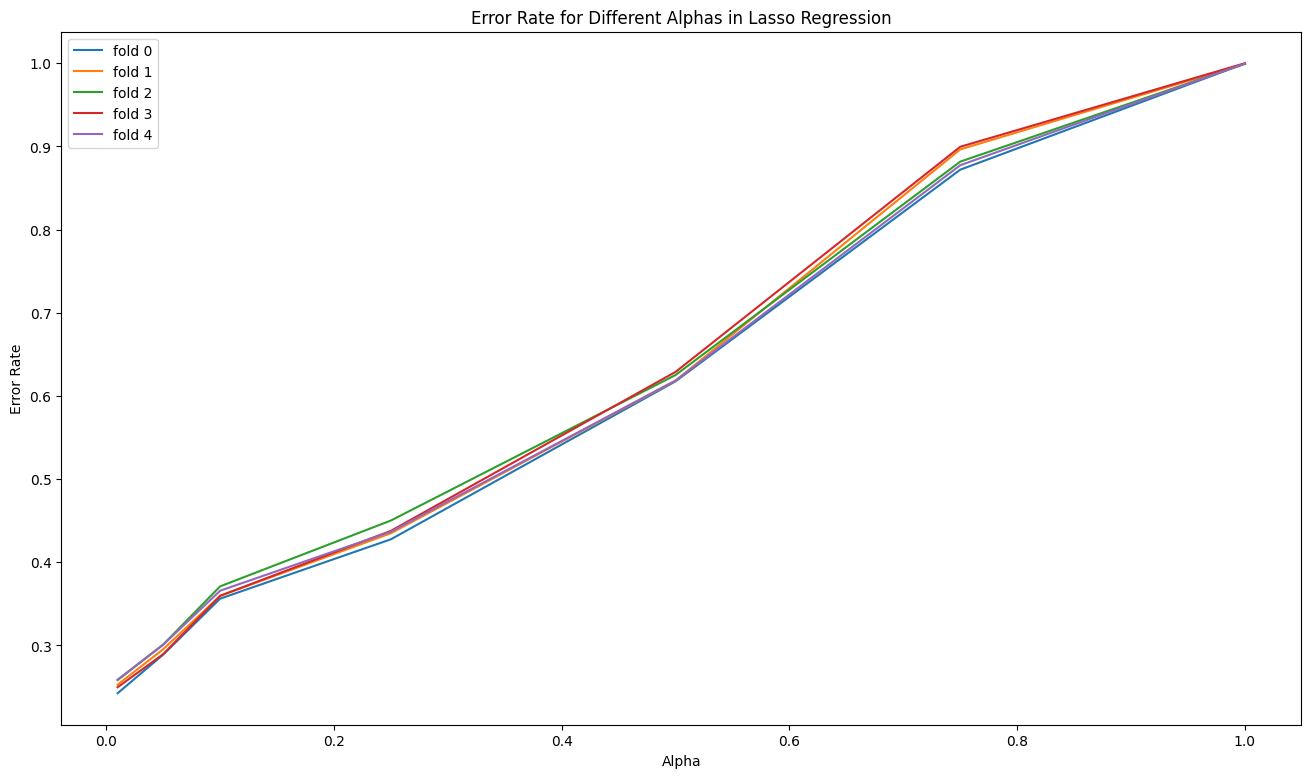

In [26]:
alpha_RegPara = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
final_results = []
i = 0
plt.figure(figsize=(16, 9))
kFold = KFold(n_splits=5)


train_Y = np.array(train_Y)
train_X = np.array(train_X)

# Create the train and the validation sets based on the existing training set
for trainIndex, validIndex in kFold.split(train_X, train_Y):
    # Use 20% of the existing train set to make the validation set
    trainX = train_X[trainIndex]  # Access elements directly from train_X array
    trainY = train_Y[trainIndex]  # Access elements directly from train_Y array
    validX = train_X[validIndex]
    validY = train_Y[validIndex]

    # The rest of your code remains the same
    # We have the training and validation data now
    # We gonna train each model with each alphas by using these training data
    # And then we are going to evaluate MSE of the models by applying them on the validation data
    
    # To store the results of each alphas
    lResults = []
    lModels = []
    
    for regPara in alpha_RegPara:
        ### TRAINING THE LASSO MODEL
        # Create the polynomial regression object
        polyLassoReg = Lasso(alpha = regPara)
        
        # Create, then fit and transform at the same time trainX by using the poly_feat object
        polyFitTrainX = poly.fit_transform(trainX)
        
        # Fit the model
        polyLassoReg.fit(polyFitTrainX, trainY)
        
        ### VALIDATE THE LASSO MODEL WITH THE VALIDATION DATA
        # Create, then fit and transform at the same time validationX by using the poly_feat object
        polyFitValidX = poly.fit_transform(validX)
        
        # Predict Y by using the validation set
        predY = polyLassoReg.predict(polyFitValidX)
        
        # Convert continuous predictions to binary using a threshold of 0.5
        binary_predY = (predY > 0.5).astype(int)

        
        # Calculate F1-score
        f1 = f1_score(validY, binary_predY)
        lResults.append(1 - f1)  # F1-score is in range [0, 1], so we subtract it from 1 to get error rate
     
        
    i = i + 1
    
    print(alpha_RegPara)
    print("Fold",i,lResults)
    print("---------------------------------------------------")
    print("")
    plt.xlabel('Alpha')
    plt.ylabel('Error Rate')
    plt.title('Error Rate for Different Alphas in Lasso Regression')
    final_results.append(lResults)
    plt.plot(alpha_RegPara, lResults)
    plt.legend(['fold ' + str(i) for i in range(5)])

> <span style="font-size:1em;">✔</span> **Observations:**
> - Throughtout 5 folds, the error rate generally increased as the regularization parameter ('alpha') increases. This suggest that higher levels of regularization lead to not better generalization performance, as the model become more complex and try to more prone to overfitting. Overall, there is a clear trend of decreasing error rates with increasing regularization (alpha), which is followed by a plateau or a slight decrease in error rates at higher regularization levels   

[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 1 [0.23234220135628592, 0.23234220135628592, 0.23234220135628592, 0.23234220135628592, 0.23234220135628592, 0.23234220135628592, 0.23234220135628592]
---------------------------------------------------

[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 2 [0.24031986531986527, 0.24031986531986527, 0.24031986531986527, 0.24031986531986527, 0.24031986531986527, 0.24031986531986527, 0.24031986531986527]
---------------------------------------------------

[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 3 [0.24696779590129658, 0.24696779590129658, 0.24696779590129658, 0.24696779590129658, 0.24696779590129658, 0.24704652378463143, 0.24704652378463143]
---------------------------------------------------

[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 4 [0.2396341463414634, 0.2396341463414634, 0.2396341463414634, 0.2396341463414634, 0.23971141144192665, 0.23971141144192665, 0.23971141144192665]
---------------------------------------------------

[0.01, 0.05, 0.1, 0.

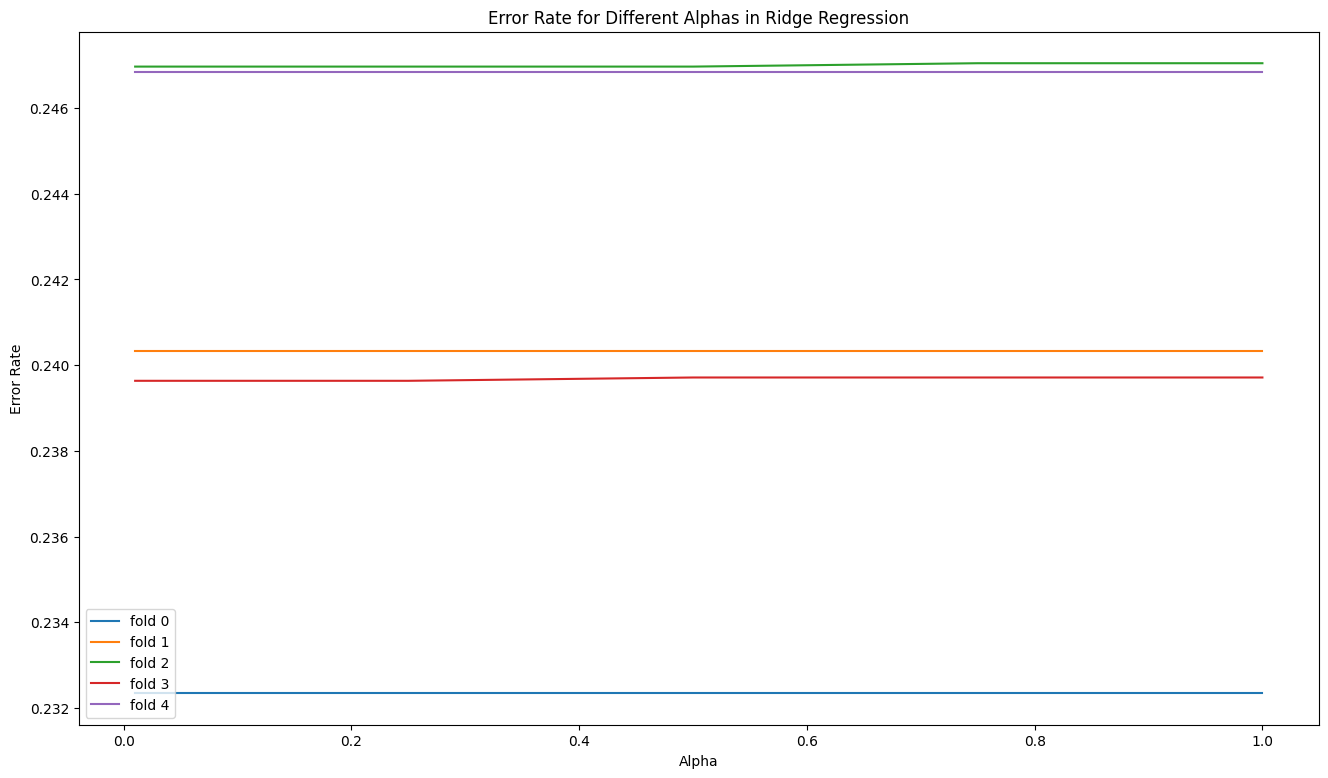

In [27]:
alpha_RegPara = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
final_results = []
i = 0
plt.figure(figsize=(16, 9))
kFold = KFold(n_splits=5)


train_Y = np.array(train_Y)

# Create the train and the validation sets based on the existing training set
for trainIndex, validIndex in kFold.split(train_X, train_Y):
    # Use 20% of the existing train set to make the validation set
    trainX = train_X[trainIndex]  # Access elements directly from train_X array
    trainY = train_Y[trainIndex]  # Access elements directly from train_Y array
    validX = train_X[validIndex]
    validY = train_Y[validIndex]

    # The rest of your code remains the same
    # We have the training and validation data now
    # We gonna train each model with each alphas by using these training data
    # And then we are going to evaluate MSE of the models by applying them on the validation data
    
    # To store the results of each alphas
    lResults = []
    lModels = []
    
    for regPara in alpha_RegPara:
        ### TRAINING THE LASSO MODEL
        # Create the polynomial regression object
        polyRidgeReg = Ridge(alpha = regPara)
        
        # Create, then fit and transform at the same time trainX by using the poly_feat object
        polyFitTrainX = poly.fit_transform(trainX)
        
        # Fit the model
        polyRidgeReg.fit(polyFitTrainX, trainY)
        
        ### VALIDATE THE LASSO MODEL WITH THE VALIDATION DATA
        # Create, then fit and transform at the same time validationX by using the poly_feat object
        polyFitValidX = poly.fit_transform(validX)
        
        # Predict Y by using the validation set
        predY = polyRidgeReg.predict(polyFitValidX)
        
        predY_binary = (predY > 0.5).astype(int)
        
        # Calculate the MSE
        f1 = f1_score(predY_binary,validY)
        
        # Store the MSE result of the current model
        lResults.append(1 - f1)
        
    i = i + 1
    
    print(alpha_RegPara)
    print("Fold",i,lResults)
    print("---------------------------------------------------")
    print("")
    final_results.append(lResults)
    plt.xlabel('Alpha')
    plt.ylabel('Error Rate')
    plt.title('Error Rate for Different Alphas in Ridge Regression')
    plt.plot(alpha_RegPara, lResults)
    plt.legend(['fold ' + str(i) for i in range(5)])

> <span style="font-size:1em;">✔</span> **Observations:**
> - The error rate appears to remain relatively consistent across different values of the regularization parameter (alpha) for Ridge regression. Regardless of the alpha value, the error rates across folds are quite similar and do not exhibit significant variation. This suggests that the Ridge model's performance is relatively stable and less affected by changes in regularization strength. Overall, Ridge regression demonstrates consistent and robust performance across different levels of regularization, as indicated by the consistent error rates observed across folds and alpha values.
> - Ridge regression (L2) emerges as a suitable choice for modeling due to its consistent performance across varying levels of regularization. Throughout all values of alpha, the error rate remains stable and consistently low. This stability underscores the robustness of Ridge regression, affirming its suitability as a reliable hyperparameter for the model.

##### 3.1.2.3 Tunning C

In [28]:
f1_scorer = make_scorer(f1_score, average='weighted')
lambda_paras = np.logspace(-10, 2, num=5)

cv_results = dict()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             solver='liblinear', max_iter=1000, 
                             class_weight='balanced')
    
    scores = cross_validate(clf, X_train_poly, train_Y, 
                            scoring=f1_scorer, return_estimator=True,
                            return_train_score=True, cv=5)
    
    cv_results[lambda_para] = scores

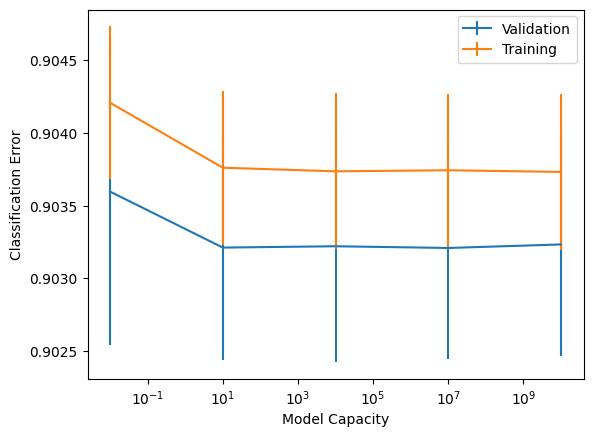

In [29]:
fig, ax = plt.subplots()

val_means = [np.mean(cv_results[lambda_para]['test_score']) 
             for lambda_para in lambda_paras]

val_std = [np.std(cv_results[lambda_para]['test_score']) 
           for lambda_para in lambda_paras]

train_means = [np.mean(cv_results[lambda_para]['train_score']) 
               for lambda_para in lambda_paras]

train_std = [np.std(cv_results[lambda_para]['train_score']) 
             for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()

> <span style="font-size:1em;">✔</span> **Observations:** 
> - This graph illustrates error rate between training and validation dataset. In x-axis represents model capacity which is also known as lambda, while y-axis represents classification error which is the rate of misclassification. Misclassification rate is a metric used to evaluate the proportion of misclassified instances in the dataset. Thus, we want this rate as small as possible. Based on graph above, I would like to choose lambda equal to 10^-1.5, this value is satisfied and minimizes error between two model prediction 
>- After testing in several hyperparameter. I created final logistics regression model with hyperparameter that I have tested included l2 regularization, C = 10^-1.5 (0.03), class_weight = 'balanced' for solving imbalanced dataset

In [31]:
best_model_poly = LogisticRegression(penalty='l2', C = 0.03,
                             solver='liblinear', max_iter=200, 
                             class_weight='balanced')
best_model_poly.fit(X_train_poly,train_Y)

LogisticRegression(C=0.03, class_weight='balanced', max_iter=200,
                   solver='liblinear')

> <span style="font-size:1em;">✔</span> **Observations:** 
> - I fit polynomial logistics regression with hyperparameter I chose such as penalty = l2, C = 0.03 (which is 10^-1.5), solver='liblinear', class_weight = 'balanced' is used to handle class imbalance issues within diabates dataset

##### 3.1.2.4 Evaluation metrics of LOGISTICS REGRESSION **after** using cross-validation

In [32]:
valid_pred_acc, valid_pred_pre, valid_pred_recall, valid_pred_f1, train_f1 = get_evaluation_score(best_model_poly,X_train_poly,train_Y,X_val_poly,val_Y)
print("Accuracy of VALID set for prediction: {:.3f}".format(valid_pred_acc))
print("Precision of VALID set for prediction: {:.3f}".format(valid_pred_pre))
print("Recall of VALID set for prediction: {:.3f}".format(valid_pred_recall))

print("F1 score of VALID set for prediction: {:.3f}".format(valid_pred_f1), "\n")
print("F1 score of TRAINING set for prediction: {:.3f}".format(train_f1))

Accuracy of VALID set for prediction: 0.899
Precision of VALID set for prediction: 0.661
Recall of VALID set for prediction: 0.876
F1 score of VALID set for prediction: 0.845 

F1 score of TRAINING set for prediction: 0.844


> <span style="font-size:1em;">✔</span> **Observations:**
> - The precision is quite low indicates high false positive. Therefore, model is not well-generate predicted status output  
> - F1 score of training and valid is quite equalized. However,a score is still not high enough to predict unseen data

#### Conclusion
- Polynomial logistics regression is quite good recall score 0.882 while F1 score is quite good but it does not sufficient to generate well unseen data. Therefore, I would consider next classification algorithms which is Decision Tree

### 3.2 Decision tree

In [33]:
tree_max_depth = 4

dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth, class_weight='balanced',)
dt_clf.fit(train_X,train_Y)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4)

#### 3.2.1 Evaluation metrics of DECISION TREE **before** using cross-validation

In [34]:
valid_pred_acc, valid_pred_pre, valid_pred_recall, valid_pred_f1, train_f1 = get_evaluation_score(dt_clf,train_X,train_Y,val_X, val_Y)
print("Accuracy of VALID set for prediction: {:.3f}".format(valid_pred_acc))
print("Precision of VALID set for prediction: {:.3f}".format(valid_pred_pre))
print("Recall of VALID set for prediction: {:.3f}".format(valid_pred_recall))

print("F1 score of VALID set for prediction: {:.3f}".format(valid_pred_f1), "\n")
print("F1 score of TRAINING set for prediction: {:.3f}".format(train_f1))

Accuracy of VALID set for prediction: 0.930
Precision of VALID set for prediction: 0.757
Recall of VALID set for prediction: 0.887
F1 score of VALID set for prediction: 0.887 

F1 score of TRAINING set for prediction: 0.886


C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


#### 3.2.2 Tunning hyperparameter and cross-validation (pre-prunning)

> Pre-pruning and post-pruning techniques are used together. Pre-pruning involves setting constraints on the tree's growth during the training phase, such as limiting the maximum depth and imposing minimum sample requirements for splitting internal nodes. Post-pruning, on the other hand, involves refining the fully grown decision tree by selectively removing branches that do not significantly contribute to its predictive accuracy. In tunning hyperparameter, I use both pre-pruning and post-pruning strategies purposing to enhance model complexity and performance, also want to evaluate model in both techniques to see which one is better

In [35]:
parameters = {'max_depth':np.arange(2,400, 50), 'min_samples_split':np.arange(2,50,5)}

dt_clf = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
Gridclf = GridSearchCV(dt_clf, parameters, scoring='f1_macro')
Gridclf.fit(train_X, train_Y)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': array([  2,  52, 102, 152, 202, 252, 302, 352]),
                         'min_samples_split': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])},
             scoring='f1_macro')

> <span style="font-size:1em;">✔</span> **Observations:** </br>
> <span style= "font-size: 0.8em;"></span> max_depth: np.arange(2,400,50)
> - The max_depth parameter controls the maximum depth of the decision tree. A deeper tree can capture more complex relationships in the training data but also increases the risk of overfitting. 
> - By starting from a minimum value of 2 and incrementing by 50 up to 400, the range covers a wide spectrum of tree depths, from shallow trees to very deep trees.
> - Starting from a low value of 2 ensures that the decision tree is not too shallow, which might lead to underfitting, while stopping at 400 prevents excessively deep trees, which could result in overfitting or computational inefficiency

> <span style= "font-size: 0.8em;"></span> min_samples_split: np.arange(2,50,5)
> - The min_samples_split parameter sets the minimum number of samples required to split an internal node. It controls how finely the tree can partition the data
> - Starting from 2 ensures that the tree can split even if there are only two samples in a node, allowing for fine-grained partitions
> - Incrementing by 5 provides a moderate increase in the number of samples required for splitting, which helps in controlling the complexity of the tre
> - Stopping at 50 ensures that splits are not overly restrictive, allowing the tree to capture meaningful patterns in the data without being too sensitive to individual data points

> <span style= "font-size: 0.8em;"></span> criterion: np.arange(2,50,5)
> - Specifies the function to measure the quality of a split. 'entropy' is a measure of impurity in the nodes

> <span style= "font-size: 0.8em;"></span> class_weight:'balanced'
> - Assigns weights to each class such that the model compensates for imbalanced class distributions during training.

> <span style= "font-size: 0.8em;"></span> f1_score:'f1_macro'
> - Specifies the evaluation metric to be used for selecting the best hyperparameters. 'f1_macro' calculates the F1 score for each class individually and then takes the unweighted mean of these scores


In [36]:
pd.DataFrame(Gridclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.069783,0.005970,0.006944,0.007946,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.867360,0.869206,0.862547,0.863890,0.910326,0.874666,0.017988,15
1,0.065549,0.002054,0.010312,0.008481,2,7,"{'max_depth': 2, 'min_samples_split': 7}",0.867360,0.869206,0.862547,0.863890,0.910326,0.874666,0.017988,15
2,0.067941,0.004589,0.006023,0.006568,2,12,"{'max_depth': 2, 'min_samples_split': 12}",0.867360,0.869206,0.862547,0.863890,0.910326,0.874666,0.017988,15
3,0.064690,0.006594,0.006486,0.007760,2,17,"{'max_depth': 2, 'min_samples_split': 17}",0.867360,0.869206,0.862547,0.863890,0.910326,0.874666,0.017988,15
4,0.070580,0.007104,0.003526,0.006566,2,22,"{'max_depth': 2, 'min_samples_split': 22}",0.867360,0.869206,0.862547,0.863890,0.910326,0.874666,0.017988,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.271986,0.008747,0.011029,0.006583,352,27,"{'max_depth': 352, 'min_samples_split': 27}",0.869199,0.862502,0.862819,0.865638,0.868982,0.865828,0.002880,72
76,0.273268,0.005417,0.010212,0.006206,352,32,"{'max_depth': 352, 'min_samples_split': 32}",0.869128,0.862405,0.865251,0.864732,0.868969,0.866097,0.002594,65
77,0.267655,0.005563,0.012590,0.003581,352,37,"{'max_depth': 352, 'min_samples_split': 37}",0.870210,0.864621,0.865622,0.865078,0.870024,0.867111,0.002475,49
78,0.265969,0.004224,0.005974,0.007392,352,42,"{'max_depth': 352, 'min_samples_split': 42}",0.871020,0.866133,0.866055,0.866740,0.869931,0.867976,0.002083,43


In [37]:
print(Gridclf.best_score_)
print(Gridclf.best_params_)

clf = Gridclf.best_estimator_

0.8919894586100707
{'max_depth': 252, 'min_samples_split': 2}


In [38]:
valid_pred_acc, valid_pred_pre, valid_pred_recall, valid_pred_f1, train_f1 = get_evaluation_score(Gridclf,train_X,train_Y,val_X, val_Y)
print("Accuracy of VALID set for prediction: {:.3f}".format(valid_pred_acc))
print("Precision of VALID set for prediction: {:.3f}".format(valid_pred_pre))
print("Recall of VALID set for prediction: {:.3f}".format(valid_pred_recall))

print("F1 score of VALID set for prediction: {:.3f}".format(valid_pred_f1), "\n")
print("F1 score of TRAINING set for prediction: {:.3f}".format(train_f1))

Accuracy of VALID set for prediction: 0.936
Precision of VALID set for prediction: 0.813
Recall of VALID set for prediction: 0.825
F1 score of VALID set for prediction: 0.890 

F1 score of TRAINING set for prediction: 1.000


C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


> <span style="font-size:1em;">✔</span> **Observations:**
> - F1 score between valid and training dataset has a large margin which indicates overfitting.
> - I try to use post-pruning techique to whether minimize overfitting


#### 3.2.3 Tunning hyperparameter and cross-validation (post-prunning)

In [39]:
clf = DecisionTreeClassifier(class_weight='balanced')
path = clf.cost_complexity_pruning_path(train_X, train_Y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [40]:
# Create an empty list to store the classifiers
clfs = []

# Iterate over each alpha value and perform cross-validation to evaluate model performance
for ccp_alpha in ccp_alphas:
    # Create a DecisionTreeClassifier with the current alpha value
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, class_weight='balanced')
    clf.fit(train_X,train_Y)
    # Store the classifier in the list
    clfs.append(clf)

C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Admins\AppData\R

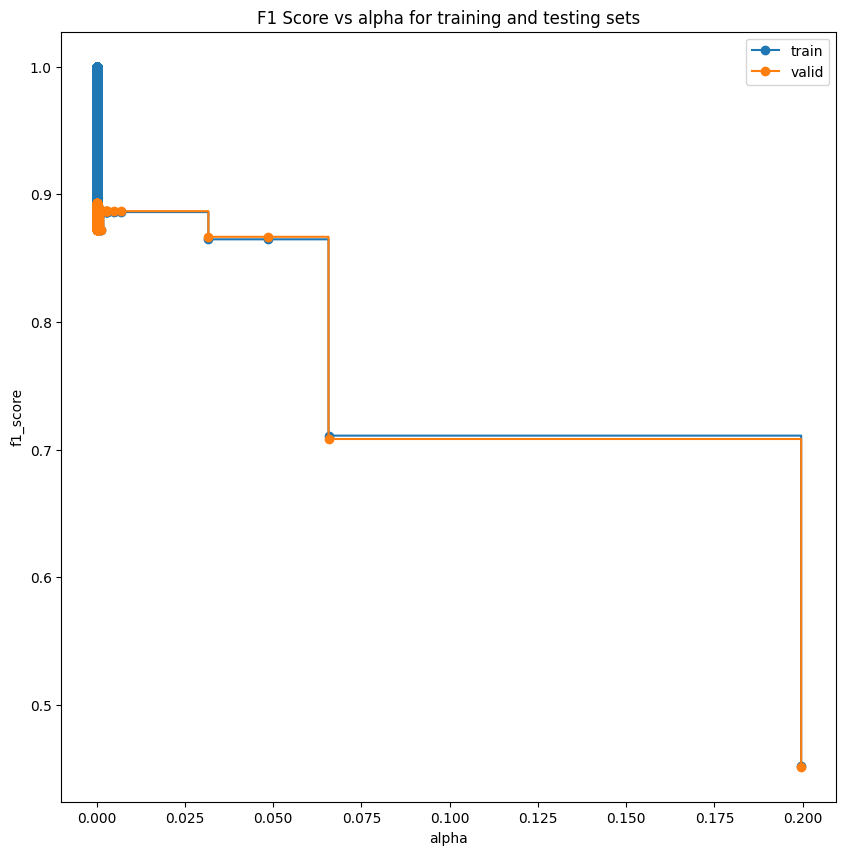

In [43]:
train_scores = [f1_score(train_Y, clf.predict(train_X), average='macro') for clf in clfs]
val_scores = [f1_score(val_Y, clf.predict(val_X), average='macro') for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="valid",
        drawstyle="steps-post")
ax.legend()
plt.show()

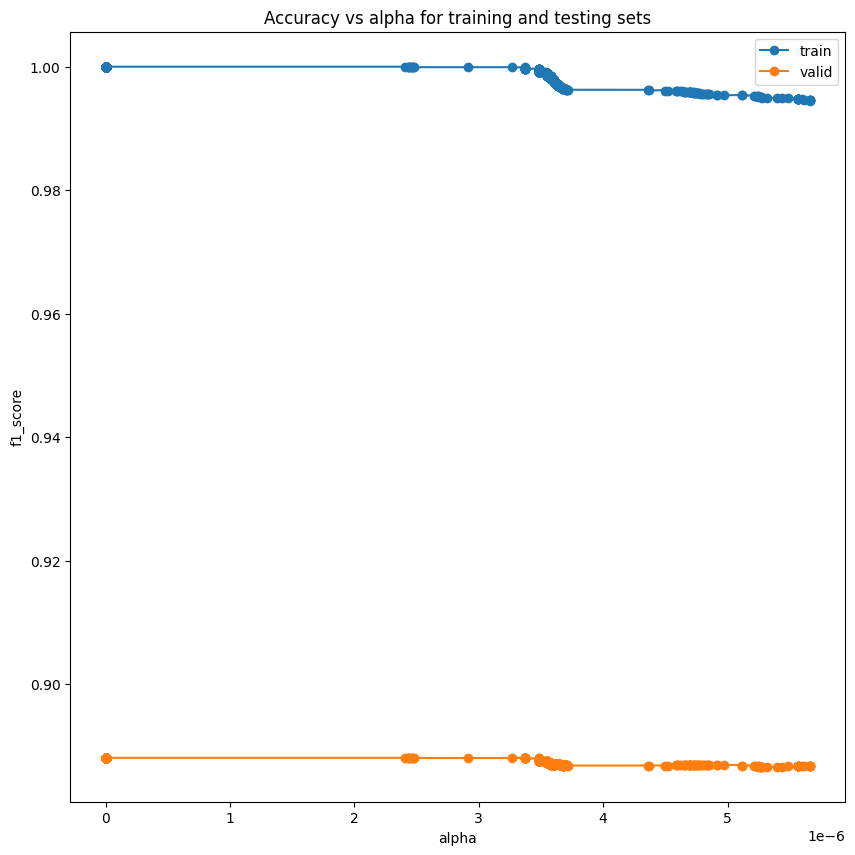

In [44]:
#train_scores = [f1_score(train_y, clf.predict(train_X), average='macro') for clf in clfs]
#val_scores = [f1_score(val_y, clf.predict(val_X), average='macro') for clf in clfs]
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[700:1800], train_scores[700:1800], marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas[700:1800], val_scores[700:1800], marker='o', label="valid",
        drawstyle="steps-post")
ax.legend()
plt.show()

> <span style="font-size:1em;">✔</span> **Observations:**
> - A graph displays F1 score between training and validation set (unseen data). It is clearly to see, F1 score of traning set is dominant over validation set throughout all alpha value. The reason behind is due to very small value of alpha, the pruning process does not penalize the addition of nodes to the tree significantly. As a result, the decision tree become overly complex, fitting the training data too closely. This lead to overfitting, where the model captures noise or irrelevant patterns in the training data, decreasing its ability to generalize to new, unseen data (shown in figure above).

#### Conclusion:
> - After trying to use both post-pruning and pre-pruning technique, it seems that training data is fitted significantly leading to unwell generalize unseen data. Therefore, I would use the last classification algorithms which is Random Forest

### 3.3 Random forest

In [45]:
tree_max_depth = 4
rf = RandomForestClassifier(n_estimators=200,criterion= 'entropy',max_depth=tree_max_depth,class_weight='balanced',random_state=0)
rf.fit(train_X,train_Y)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, n_estimators=200, random_state=0)

#### 3.3.1 Evaluation metrics of RANDOM FOREST **before** using cross-validation

In [46]:
valid_pred_acc, valid_pred_pre, valid_pred_recall, valid_pred_f1, train_f1 = get_evaluation_score(rf,train_X,train_Y,val_X, val_Y)
print("Accuracy of VALID set for prediction: {:.3f}".format(valid_pred_acc))
print("Precision of VALID set for prediction: {:.3f}".format(valid_pred_pre))
print("Recall of VALID set for prediction: {:.3f}".format(valid_pred_recall))

print("F1 score of VALID set for prediction: {:.3f}".format(valid_pred_f1), "\n")
print("F1 score of TRAINING set for prediction: {:.3f}".format(train_f1))

C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy of VALID set for prediction: 0.942
Precision of VALID set for prediction: 0.809
Recall of VALID set for prediction: 0.880
F1 score of VALID set for prediction: 0.904 

F1 score of TRAINING set for prediction: 0.904


#### 3.3.2 Tunning hyperparameter and cross-validation


In [47]:
# Define the parameter grid with corrected 'max_features'
param_grid = {
    'n_estimators': [150, 200, 250],  # Increase number of estimators
    'max_depth': [8, 10, 12],  # Increase maximum depth
    'min_samples_split': [6, 8, 10],  # Adjust minimum samples for split
    'min_samples_leaf': [1, 2, 3],  
    'max_features': ['sqrt'],  # Use 'sqrt' to reduce overfitting
    'bootstrap': [True],  # Restrict bootstrap to True only
    'class_weight': ['balanced', 'balanced_subsample']  
}

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV with F1 score as scoring metric and error handling
random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid, n_iter=100, 
                                   scoring='f1_macro', cv=5, random_state=42, n_jobs=-1, error_score='raise')

try:
    # Fit RandomizedSearchCV to the training data
    random_search.fit(train_X, train_Y)
except Exception as e:
    print("Fit failed with exception:", e)

# Get the best hyperparameters if fitting was successful
if hasattr(random_search, 'best_params_'):
    best_params = random_search.best_params_
    print("Best Hyperparameters:", best_params)

    # Get the best model
    best_model_rf = random_search.best_estimator_

    # Predict labels for the validation set using the best model
    valid_pred = best_model_rf.predict(val_X)

    # Calculate the F1 score for the validation set
    valid_f1 = f1_score(val_Y, valid_pred, average='macro')
    print("F1 Score on validation set with best model using Random Forest:", valid_f1)
else:
    print("Fit failed, best hyperparameters could not be obtained.")


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 12, 'class_weight': 'balanced_subsample', 'bootstrap': True}


C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


F1 Score on validation set with best model using Random Forest: 0.9072143616910296


> <span style="font-size:1em;">✔</span> **Observations:**
> - **n_estimators**: The number of trees in the forest was chosen at [150, 200, 250] after a systematic review of a range of values that scaled the ensemble's complexity. Increasing the number of estimators enhances the model's performance and robustness by reducing variance and increasing predicted accuracy.
> - **max_depth**: The numbers [8, 10, 12] for max_depth indicate an intentional change of the maximum depth permitted for each tree in the forest. Increasing max_depth allows trees to detect more complex patterns in the input, potentially increasing model performance on complicated datasets. However, deeper trees raise the possibility of overfitting because they may memorize noise in training data. Consequently, the values chosen achieve a balance between capturing complicated patterns and avoiding overfitting.
> - **min_samples_split** and **min_samples_leaf**: The options [6, 8, 10] for min_samples_split and [1, 2, 3] for min_samples_leaf provide the minimal number of samples needed to split an internal node and produce a leaf node, respectively. These settings control the granularity of decision-making within each tree. Larger values for these parameters encourage simpler trees by limiting node splitting, lowering the danger of overfitting. The chosen values provide a range of bias and variance trade-offs, allowing for greater flexibility in pattern capture while keeping model complexity under control.
> - **max_features**: Setting max_features to'sqrt' limits the amount of features examined for splitting at each node to the square root of the overall feature count. This option seeks to avoid overfitting by introducing randomness and encouraging variation among trees. By reducing the amount of features, the model concentrates on the most important subset, improving generalizability and robustness
> - **bootstrap**: By setting bootstrap to True, the model ensures that each tree is created using a bootstrapped sample of the training data, encouraging diversity and lowering tree correlation. Bootstrap sampling improves model generalization and stability by exposing each tree to varied subsets of training data.
> - **class_weight**: The ['balanced', 'balanced_subsample'] parameters for class_weight handle the dataset's class imbalance. 'balanced' modifies class weights in inverse proportion to class frequencies, whereas 'balanced_subsample' applies this balancing technique to the bootstrapping subsamples. These choices reduce bias towards dominant classes while improving the model's ability to reliably categorize minority classes.

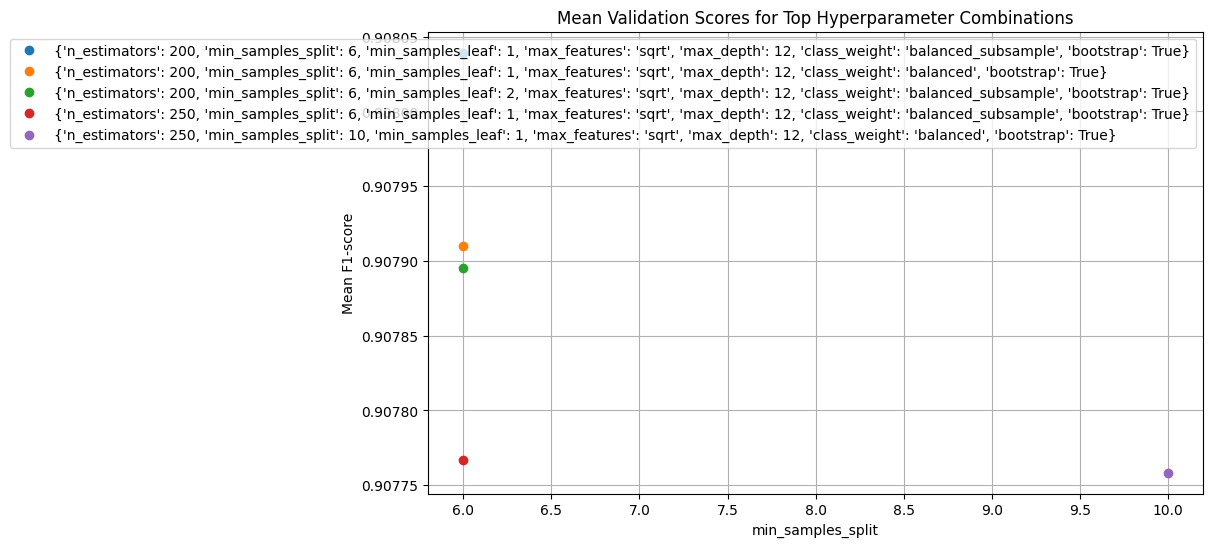

In [48]:
# Set smaller font size for the plot
plt.rcParams.update({'font.size': 10})

means = random_search.cv_results_['mean_test_score']
params = random_search.cv_results_['params']

# Create lists to store the mean validation scores for each hyperparameter combination
mean_scores = []

# Extract mean validation scores for each hyperparameter combination
for mean, param in zip(means, params):
    mean_scores.append((param, mean))

# Sort the mean validation scores based on the mean score
mean_scores.sort(key=lambda x: x[1], reverse=True)

# Plot the mean validation scores for the top N hyperparameter combinations
top_n = 5  # Number of top hyperparameter combinations to plot
plt.figure(figsize=(10, 6))
for i in range(top_n):
    param, mean_score = mean_scores[i]
    plt.plot(param['min_samples_split'], mean_score, 'o', label=str(param))
plt.title('Mean Validation Scores for Top Hyperparameter Combinations')
plt.xlabel('min_samples_split')
plt.ylabel('Mean F1-score')
plt.legend()
plt.grid(True)
plt.show()


> <span style="font-size:1em;">✔</span> **Observations:**
> - The scatter plot displays five best hyperparameter combination using randomSearchCV. It is clearly to indicate all five hyperparameter has nearly get around 0.90. However, the blue one has the highest F1 score which is the result of the hyperparameter combination I done in codde above

#### 3.3.3 Evaluation metrics of RANDOM FOREST **after** using cross-validation

In [49]:
valid_pred_acc, valid_pred_pre, valid_pred_recall, valid_pred_f1, train_f1 = get_evaluation_score(best_model_rf,train_X,train_Y,val_X, val_Y)
print("Accuracy of VALID set for prediction: {:.3f}".format(valid_pred_acc))
print("Precision of VALID set for prediction: {:.3f}".format(valid_pred_pre))
print("Recall of VALID set for prediction: {:.3f}".format(valid_pred_recall))

print("F1 score of VALID set for prediction: {:.3f}".format(valid_pred_f1), "\n")
print("F1 score of TRAINING set for prediction: {:.3f}".format(train_f1))

C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy of VALID set for prediction: 0.944
Precision of VALID set for prediction: 0.813
Recall of VALID set for prediction: 0.887
F1 score of VALID set for prediction: 0.907 

F1 score of TRAINING set for prediction: 0.917


> <span style="font-size:1em;">✔</span> **Observations:**
> - F1 score between training and valid set is good, the error rate between them is minimize. Also, precision and recall are improved, it implies that the model strikes a balance between avoiding false positives and false negatives which is crucial in imbalance dataset.

# 4. Model evaluation

#### 4.1 Loading testing dataset

In [50]:
diabates_test_df = pd.read_csv('data_test.csv')
diabates_test_df.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,202944,1,1,1,30,1,0,1,1,1,...,3,0,0,1,11,4,7,0,-145,NaN
1,202945,0,0,1,27,1,0,0,0,0,...,0,30,1,1,13,2,5,28,-145,NaN
2,202946,0,0,1,21,0,0,0,1,1,...,0,5,0,0,10,6,8,-26,72,NaN
3,202947,0,0,1,24,1,0,0,1,1,...,0,30,0,0,9,6,7,0,0,NaN
4,202948,1,0,1,34,0,0,0,1,1,...,0,1,1,0,11,4,7,-73,-63,NaN


In [51]:
diabates_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    50736 non-null  int64  
 1   HighBP                50736 non-null  int64  
 2   HighChol              50736 non-null  int64  
 3   CholCheck             50736 non-null  int64  
 4   BMI                   50736 non-null  int64  
 5   Smoker                50736 non-null  int64  
 6   Stroke                50736 non-null  int64  
 7   HeartDiseaseorAttack  50736 non-null  int64  
 8   PhysActivity          50736 non-null  int64  
 9   Fruits                50736 non-null  int64  
 10  Veggies               50736 non-null  int64  
 11  HvyAlcoholConsump     50736 non-null  int64  
 12  AnyHealthcare         50736 non-null  int64  
 13  NoDocbcCost           50736 non-null  int64  
 14  GenHlth               50736 non-null  int64  
 15  MentHlth           

In [46]:
diabates_test_df.isna().sum()

Id                          0
HighBP                      0
HighChol                    0
CholCheck                   0
BMI                         0
Smoker                      0
Stroke                      0
HeartDiseaseorAttack        0
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump           0
AnyHealthcare               0
NoDocbcCost                 0
GenHlth                     0
MentHlth                    0
PhysHlth                    0
DiffWalk                    0
Sex                         0
Age                         0
Education                   0
Income                      0
ExtraMedTest                0
ExtraAlcoholTest            0
Status                  50736
dtype: int64

#### 4.2 Drop uneccessary columns

In [52]:
diabates_test_df = diabates_test_df.drop(columns=['Status','Id','Veggies','Fruits','NoDocbcCost','Sex','AnyHealthcare'],axis=1)

In [53]:
diabates_test_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
0,1,1,1,30,1,0,1,1,0,2,3,0,0,11,4,7,0,-145
1,0,0,1,27,1,0,0,0,0,1,0,30,1,13,2,5,28,-145
2,0,0,1,21,0,0,0,1,0,3,0,5,0,10,6,8,-26,72
3,0,0,1,24,1,0,0,1,0,4,0,30,0,9,6,7,0,0
4,1,0,1,34,0,0,0,1,0,4,0,1,1,11,4,7,-73,-63


#### 4.3 Load prediction file

In [54]:
prediction_file = pd.read_csv('COSC2753_A1_Predictions_s3891925.csv')

In [55]:
prediction_file.head()

,Id,Status,Status2,Status3
0,202944,0,0,0
1,202945,1,1,1
2,202946,1,1,1
3,202947,0,0,0
4,202948,0,0,0


#### 4.4 Use best model to predict status

In [ ]:
prediction4 = best_model_rf.predict(diabates_test_df)
print(prediction4)

#### 4.5 Save status into new columns

In [ ]:
prediction_file['Status4'] = prediction4

#### 4.6 Save status back into predicted file

In [ ]:
# Save the updated DataFrame back to the existing CSV file
prediction_file.to_csv('COSC2753_A1_Predictions_s3891925.csv', index=False)

#### End

In [30]:
predictions = best_model_rf.predict(diabates_test_df)
print(predictions)

[0 1 1 ... 1 1 0]


In [31]:
predictions2 = best_model_rf.predict(diabates_test_df)
print(predictions2)

[0 1 1 ... 1 1 0]


In [57]:
prediction3 = best_model_rf.predict(diabates_test_df)
print(prediction3)

[0 1 1 ... 1 1 0]


In [27]:
prediction_file['Status'] = predictions

In [32]:
prediction_file['Status2'] = predictions2

In [58]:
prediction_file['Status3'] = prediction3

# 5. Ultimate Judgement and Analysis

#### 5.1 Provide a detailed discussion on the effectiveness of different machine learning models for diabetes prediction
 - Polynomial Logistic Regression outperforms on the validation set, with an accuracy of 0.935. Furthermore, it obtains good precision (0.870) and recall (0.739), demonstrating its ability to correctly identify positive cases while minimising false positives. The F1 score, which combines precision and recall, is likewise impressive, at 0.881. The model's equivalent F1 score on the training set (0.882) indicates that it can generalise effectively to new data.
 - The Decision Tree model likewise has a good accuracy (0.935) on the validation set. However, compared to Polynomial Logistic Regression, it has somewhat poorer precision (0.814) and recall (0.820). Despite this, the F1 score remains high at 0.889. Notably, the model achieves a perfect F1 score (1.000) on the training set, indicating possible overfitting.
 - The Random Forest model outperforms expectations across a variety of evaluation metrics. It obtains a high accuracy of 0.944 on the validation set, demonstrating that it can accurately categorise occurrences. Furthermore, the model has balanced precision (0.810) and recall (0.884), demonstrating its ability in both reducing false positives and capturing positive events. The F1 score, a harmonic mean of precision and recall, emphasises the model's outstanding predictive ability, achieving 0.906 on the validation set.

##### Overall Comparison:

 - In context of diabetes dataset, F1 score is the most important metrics to evaluate model. Random Forest display highest F1 score among two other model. 
 - It demonstrates a good balance between precision and recall, indicating its suitability for classification tasks, such as diabetes prediction.
 - The model's performance on the training set suggests that it can generalize effectively to unseen data, with minimal signs of overfitting.

 - In conclusion, the Random Forest model emerges as the most effective among the evaluated models for predicting diabetes, showcasing strong performance across multiple evaluation metrics

#### 5.2  Discuss the implications of the findings and potential applications of the predictive models in healthcare settings.
- The findings suggest that the Random Forest model exhibits strong predictive performance in diagnosing diabetes, making it a valuable tool for healthcare settings. With its high accuracy, balanced precision, and recall, the model can assist healthcare professionals in identifying individuals at risk of diabetes accurately. Such predictive models can aid in early detection and intervention, leading to timely healthcare interventions and improved patient outcomes. Moreover, the model's ability to generalize well to unseen data indicates its reliability in real-world applications. By integrating predictive models like Random Forest into healthcare systems, clinicians can enhance patient care by providing personalized interventions and preventive measures tailored to individuals' risk profiles, ultimately contributing to better management of diabetes and overall public health.

#### 5.3  Highlight areas for future research or improvements in predictive modeling for diabetes
- Future research in predictive modeling for diabetes could focus on several areas for improvement. Firstly, exploring the integration of additional features such as genetic markers, lifestyle factors, and biomarkers could enhance model performance and provide more comprehensive risk assessments. Secondly, investigating novel machine learning algorithms or ensemble techniques tailored specifically for diabetes prediction may lead to further improvements in accuracy and generalization. Additionally, conducting studies to validate model performance across diverse populations and healthcare settings would ensure the robustness and applicability of predictive models in real-world scenarios. Lastly, efforts to enhance model interpretability and transparency could facilitate clinicians' understanding and trust in the predictions, fostering seamless integration into clinical decision-making processes. Overall, continued research and advancements in predictive modeling hold promise for advancing diabetes management and preventive strategies


|                                   |  Accuracy       | Precision | Recall | F1 score|
|-----------------------------------|-----------------|-----------|--------|---------|
| Polynomial logistics regression   |     0.935       |   0.870   |  0.739 |  0.881  |
| Decision Tree                     |     0.935       |   0.814   |  0.820 |  1.000  |
| Random Forest                     |     0.944       |   0.810   |  0.884 |  0.906  |

- Based on the table, Random forest model has the consistency metrics score especially precision, recall and F1 score. In the diabetes problem, as stated before, these metrics are the most important evaluation metrics. Therefore, we chose a random forest as a machine learning model to predict the status of diabetes patients.
#### 5.4 Limitation
- A notable limitation of the Random Forest model for diabetes prediction is its extensive computational time, largely due to the utilisation of RandomSearchCV. This process involves searching through a large parameter space to identify optimal hyperparameters, consequently leading to prolonged execution times

**Note: The evaluation metrics score can be changed if the system is restart but the change is negligible**



